# Temperature, Humidity and Pressure in Lab on 03-05-2018 

Climate control unit is malfunctioning, monitoring the temperature int he CeNTREX lab with a [Yocto-Meto unit](https://www.yoctopuce.com/EN/products/usb-environmental-sensors/yocto-meteo) borrowed from Matt.  

Temperature and humidity are setpoints are
  * 70 degrees Fahrenheit (21.11 degrees Celcius)
  * 40%

In [22]:
def set_fontsize(ax, fs):
    """
    Function to set font sizes for axes objects
    """
    ax.tick_params(axis = 'both', which = 'major', labelsize = fs)
    ax.tick_params(axis = 'both', which = 'minor', labelsize = fs)
    ax.xaxis.label.set_size(fs)
    ax.yaxis.label.set_size(fs)
    ax.title.set_size(fs)

In [16]:
import pandas as pd

data_dir = '../Data/'
fname = 'CentrexYocto_Temperature_20180503.tsv'
names = ['date', 'time', 'temperature', 'pressure', 'humidity']

df_environment = pd.read_csv(data_dir+fname, sep = '\t', header = None,
                             names = names)
df_environment['timestamp'] = pd.to_datetime(df_environment.date+' '+df_environment.time)
df_environment.head()

,date,time,temperature,pressure,humidity,timestamp
0,5/3/2018,2:54:10 PM,25.44,1010.43,42.3,2018-05-03 14:54:10
1,5/3/2018,2:54:30 PM,25.44,1010.41,38.0,2018-05-03 14:54:30
2,5/3/2018,2:54:42 PM,25.40,1010.35,37.9,2018-05-03 14:54:42
3,5/3/2018,2:55:02 PM,25.38,1010.32,38.6,2018-05-03 14:55:02
4,5/3/2018,2:55:14 PM,25.32,1010.17,37.5,2018-05-03 14:55:14


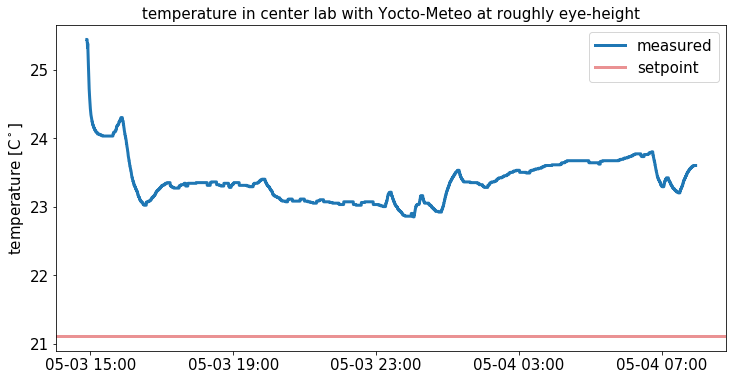

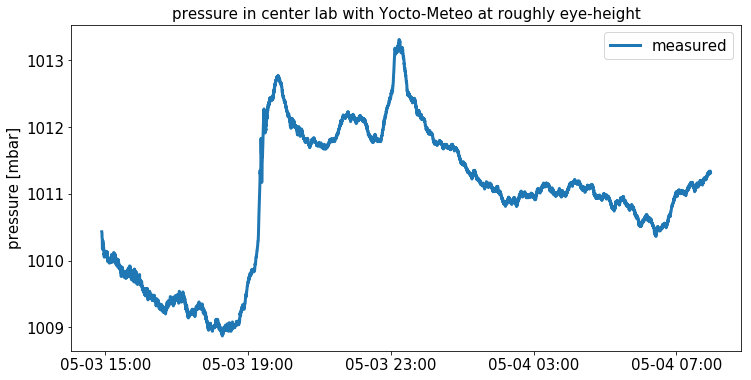

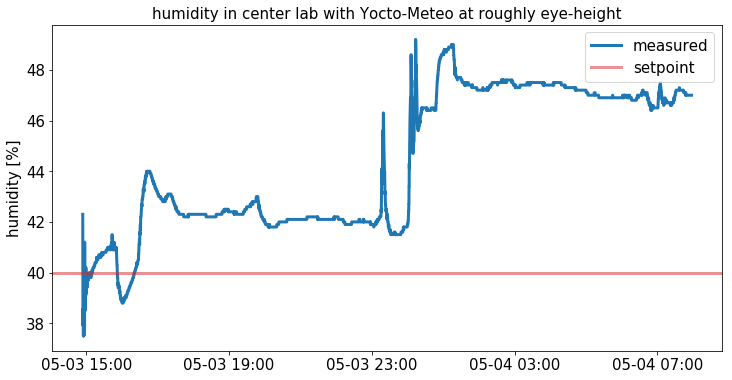

In [37]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

ylabels = {'temperature': 'temperature [C$^\circ$]', 
           'pressure': 'pressure [mbar]', 
           'humidity': 'humidity [%]'}
setpoints = {'temperature':21.111111, 'pressure':None, 'humidity':40}

for val in ['temperature', 'pressure', 'humidity']:

    fig, ax = plt.subplots(figsize = (12,6))
    ax.plot(df_environment.timestamp, df_environment[val], lw = 3,
            label = 'measured')
    ax.set_ylabel(ylabels[val])
    ax.set_title('{0} in center lab with Yocto-Meteo at roughly eye-height'.format(val))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))
    ax.set_xticks(ax.get_xticks()[::2])
    ax.axhline(setpoints[val], color = 'C3', lw = 3, label = 'setpoint', alpha = 0.5) \
    if setpoints[val] is not None else None
    set_fontsize(ax, 15)
    ax.legend(fontsize = 15)
    fig.savefig('{0}_lab.pdf'.format(val))